### Importing necessary libraries

In [12]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
sns.set_palette('YlOrRd_r', n_colors = 3)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/parkinsons_data.txt")

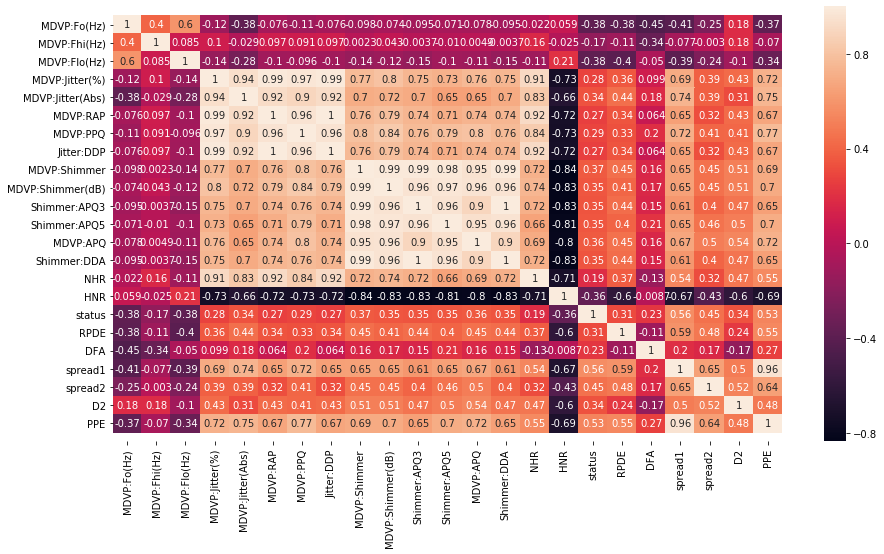

In [3]:
corr = df.corr()
plt.figure(figsize=(15,8))
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

The heatmap shows that correlation beetween MDVP:Jitter(%) and MDVP:Jitter(Abs), MDVP:RAP and MDVP:Jitter(%), MDVP:PPQ and MDVP:Jitter(%), MDVP:PPQ and MDVP:RAP, Jitter:DDP and MDVP:Jitter(%),  Jitter:DDP and MDVP:PPQ, Jitter:DDP and MDVP:RAP, MDVP:Shimmer(dB) and MDVP:Shimmer, Shimmer:APQ3 and MDVP:Shimmer, Shimmer:APQ3 and MDVP:Shimmer(dB),  Shimmer:APQ5 and MDVP:Shimmer, Shimmer:APQ5 and MDVP:Shimmer(dB), Shimmer:APQ5 and Shimmer:APQ3, Shimmer:DDA and MDVP:Shimmer,  Shimmer:DDA and MDVP:Shimmer(dB), Shimmer:DDA and Shimmer:APQ3, Shimmer:DDA and Shimmer:APQ5, Shimmer:DDA and MDVP:APQ, PPE and spread1 are high. 

In [4]:
X = df.drop(['status','name'], axis = 1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    random_state = 42, stratify = y)

In [5]:
norm = StandardScaler().fit(X_train)
X_train_t = pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))
X_test_t = pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

### Logistic Regression

In [6]:
logreg = LogisticRegression(random_state = 8)
logreg_parameters = {'penalty': ['l1', 'l2'], 'C': np.logspace(-4, 4, 20),'class_weight':['balanced',None]}
grid_search = GridSearchCV(logreg, param_grid=logreg_parameters, cv = 5)
grid_search.fit(X_train, y_train)
model_logreg = grid_search.best_estimator_
y_pred = grid_search.best_estimator_.predict(X_test)
y_train_pred = grid_search.best_estimator_.predict(X_train)

Feature: 0, Score: 0.0016
Feature: 1, Score: -0.0039
Feature: 2, Score: -0.0073
Feature: 3, Score: 0.0100
Feature: 4, Score: 0.0001
Feature: 5, Score: 0.0073
Feature: 6, Score: 0.0069
Feature: 7, Score: 0.0219
Feature: 8, Score: 0.0968
Feature: 9, Score: 0.9421
Feature: 10, Score: 0.0497
Feature: 11, Score: 0.0579
Feature: 12, Score: 0.0840
Feature: 13, Score: 0.1492
Feature: 14, Score: 0.0388
Feature: 15, Score: 0.0931
Feature: 16, Score: 0.5527
Feature: 17, Score: 0.5931
Feature: 18, Score: 1.0263
Feature: 19, Score: 0.3822
Feature: 20, Score: 2.0563
Feature: 21, Score: 0.5055


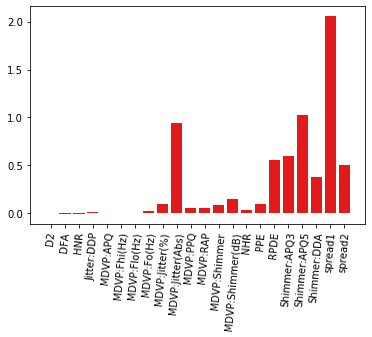

In [7]:
importance = model_logreg.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.4f' % (i,v))
plt.bar([col for col in df.columns.difference(["status", 'name'])], importance)
plt.xticks(df.columns.difference(["status", "name"]), rotation = '85')
plt.show()

### DecisionTree

In [8]:
tree = DecisionTreeClassifier(random_state = 8)
tree_parameters = {'max_depth': range(2, 10),'min_samples_split':range(2, 12, 2),'criterion':['gini','entropy'],'class_weight':['balanced',None]}
grid_search = GridSearchCV(tree, param_grid=tree_parameters, cv = 5)
grid_search.fit(X_train, y_train)
model_tree = grid_search.best_estimator_
y_pred = grid_search.best_estimator_.predict(X_test)
y_train_pred = grid_search.best_estimator_.predict(X_train)

Feature: 0, Score: 0.1371
Feature: 1, Score: 0.0000
Feature: 2, Score: 0.0340
Feature: 3, Score: 0.0000
Feature: 4, Score: 0.0000
Feature: 5, Score: 0.0000
Feature: 6, Score: 0.0706
Feature: 7, Score: 0.0000
Feature: 8, Score: 0.0000
Feature: 9, Score: 0.0244
Feature: 10, Score: 0.0000
Feature: 11, Score: 0.0000
Feature: 12, Score: 0.0000
Feature: 13, Score: 0.0000
Feature: 14, Score: 0.0910
Feature: 15, Score: 0.0000
Feature: 16, Score: 0.0000
Feature: 17, Score: 0.0000
Feature: 18, Score: 0.0000
Feature: 19, Score: 0.0000
Feature: 20, Score: 0.0000
Feature: 21, Score: 0.6430


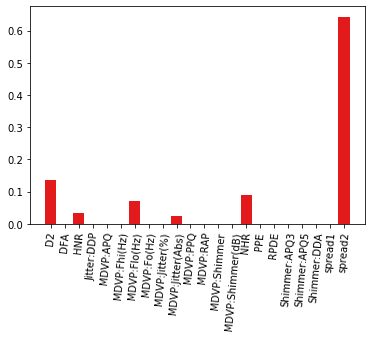

In [9]:
importance = model_tree.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.4f' % (i,v))
plt.bar([col for col in df.columns.difference(['status','name'])], importance)
plt.xticks(df.columns.difference(['status','name']), rotation = '85')
plt.show()

### Random forest


In [10]:
forest = RandomForestClassifier(random_state = 8)
forest_parameters = {'bootstrap': [True, False],
 'max_depth': range(8, 15),
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': range(5, 20),
 'class_weight':['balanced', None]}
grid_search = GridSearchCV(forest, param_grid=forest_parameters, cv = 5)
grid_search.fit(X_train, y_train)
model_forest = grid_search.best_estimator_
y_pred = grid_search.best_estimator_.predict(X_test)
y_train_pred = grid_search.best_estimator_.predict(X_train)

Feature: 0, Score: 0.0692
Feature: 1, Score: 0.0242
Feature: 2, Score: 0.0605
Feature: 3, Score: 0.0024
Feature: 4, Score: 0.0625
Feature: 5, Score: 0.0305
Feature: 6, Score: 0.0218
Feature: 7, Score: 0.0271
Feature: 8, Score: 0.0004
Feature: 9, Score: 0.0296
Feature: 10, Score: 0.0297
Feature: 11, Score: 0.0512
Feature: 12, Score: 0.0362
Feature: 13, Score: 0.0218
Feature: 14, Score: 0.1046
Feature: 15, Score: 0.0157
Feature: 16, Score: 0.0181
Feature: 17, Score: 0.0239
Feature: 18, Score: 0.0949
Feature: 19, Score: 0.0124
Feature: 20, Score: 0.0302
Feature: 21, Score: 0.2330


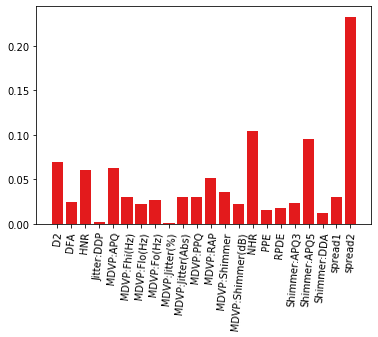

In [11]:
importance = model_forest.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.4f' % (i,v))
plt.bar([col for col in df.columns.difference(['status','name'])], importance)
plt.xticks(df.columns.difference(['status','name']), rotation = '85')
plt.show()